<a href="https://colab.research.google.com/github/mikias-wondim/Bean-Leaf-Disease-Detection-using-Fine-Tuned-TensorFlow-Model/blob/main/Project_2_Fine_Tuning_Bean_Leaves_Disease_Detection_Model_using_TensorFlow_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Two - Fine Tuning Corn Plant Disease Detection Model


## Introduction

**Beans** are a staple crop that is grown in many parts of the world. However, bean plants are susceptible to a number of diseases that can significantly reduce yields and cause economic losses. Early and accurate detection of bean diseases is crucial for effective disease management and minimizing crop losses.

Traditional methods for bean disease detection rely on visual inspection by trained experts. This can be a time-consuming and subjective process, and it may not always be possible to accurately identify diseases in the early stages.

**Deep learning models** offer a promising solution for bean plant disease detection. Deep learning models can be trained to identify diseases based on images of bean plants. This can be a more objective and efficient way to detect diseases, and it can also be used to identify diseases in the early stages when they are more treatable.

This **project** aims to develop a deep learning model for bean plant disease detection using fine-tuning. Fine-tuning is a technique that allows us to take a pre-trained model that has been trained on a large dataset and adapt it to a new task with a smaller dataset. This can be a very effective way to train a deep learning model for a specific task, such as bean plant disease detection.

## Dataset and the steps we're going to follow

**Dataset**:

`Beans` is a dataset of images of beans taken in the field using smartphone cameras. It consists of 3 classes: 2 disease classes and the healthy class. Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated by experts from the National Crops Resources Research Institute (NaCRRI) in Uganda and collected by the Makerere AI research lab.

Homepage: https://github.com/AI-Lab-Makerere/ibean/


**Steps:**

1. Data Preprocessing:
* Load the Bean Disease dataset from TensorFlow Datasets.
* Perform any necessary data cleaning and preprocessing, such as removing duplicate images or resizing images.
* Split the dataset into training, validation, and test sets.

2. Model Building and Selection:
* Build callbacks and our model
* Choose a pre-trained model that is suitable for image classification tasks, such as ResNet50 or EfficientNetB0.
* Load the pre-trained model and remove the top layer (i.e., the classification layer).

3. Model Architecture:
* Add a new classification layer to the pre-trained model, with the number of neurons equal to the number of corn disease classes.
* Freeze the initial layers of the pre-trained model to prevent them from being updated during training.
* Unfreeze the top layers of the pre-trained model so that they can be updated during training.

4. Model Training:
* Compile the model using an appropriate loss function (e.g., categorical cross-entropy) and optimizer (e.g., Adam).
* Train the model on the training set and monitor its performance on the validation set.
* Use techniques such as early stopping and model checkpointing to prevent overfitting and save the best performing model.
5. Model Evaluation:
* Evaluate the performance of the fine-tuned model on the test set using metrics such as accuracy, precision, recall, and F1-score.
* Analyze the results and identify areas for improvement.
6. Visualized Evaluation
* Plot the learning curves
* Visualize Confusion Metrics
* Analyze the prediction using classification report
7. Model Deployment:
Once the model is trained and evaluated, you can deploy it for real-world use.
This may involve saving the model to disk,

## Lets Code

If you are excited 🤓 like I'm, lets see how we're going to build 🧰 the most amazing project on **Agro-Intelligence**.

Without further-a-due lets deep dive in 🙌

### Set up our libraries

In [3]:
# Import the necessary libraries
import itertools
import os

import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

### Check our working environment

It's always a good practice to check where we are spending our working hours.

In [4]:
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.15.0
Hub version: 0.16.1
GPU is NOT AVAILABLE


In [5]:
# Check the hardware we're working with (the available GPU on colab mostly is Nvidia's)
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


## Importing our dataset

In [6]:
# Get all available datasets in TFDS
dataset_list = tfds.list_builders()

# Set our target dataset and see if it exists
target_dataset = "beans"
print(target_dataset, "is Available" if target_dataset in dataset_list else "is NOT AVAILABLE", "at TensorFlow Datasets")

beans is Available at TensorFlow Datasets


To get access to the Beans dataset from the TFDS, we can use the [`tfds.load()`](https://www.tensorflow.org/datasets/api_docs/python/tfds/load) method.

In particular, we'll have to pass it a few parameters to let it know what we're after:
* `name` (str) : the target dataset (e.g. `"beans"`)
* `split` (list, optional) : what splits of the dataset we're after (e.g. `["train", "validation", "test"]`)
  
* `shuffle_files` (bool) : whether or not to shuffle the files on download, defaults to `False`
* `as_supervised` (bool) : `True` to download data samples in tuple format (`(data, label)`) or `False` for dictionary format
* `with_info` (bool) : `True` to download dataset metadata (labels, number of samples, etc)

> **Note:** Calling the `tfds.load()` method will start to download a target dataset to disk if the `download=True` parameter is set (default). This dataset could be 100GB+, so make sure you have space.

In [7]:
#  beans dataset
dataset_name = 'beans'

# Load in the data (takes about 5-6 minutes in Google Colab)
(train_data, validation_data), ds_info = tfds.load(name=dataset_name, # target dataset to get from TFDS
                                             split=["train", "validation"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=True, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns tuple (data, ds_info)
test_data,  = tfds.load(name=dataset_name, # target dataset to get from TFDS
                                             split=["test"], # test split of the data
                                             shuffle_files=False, # shuffle files
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteK7S5LG/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteK7S5LG/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteK7S5LG/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


### Getting to know our dataset

In [8]:
# See what's stored on the features of the dataset and their shape
ds_info.features

FeaturesDict({
    'image': Image(shape=(500, 500, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
})

In [9]:
# Get class names
class_names = ds_info.features["label"].names
class_names # print the class names

['angular_leaf_spot', 'bean_rust', 'healthy']

In [10]:
# Take one sample off the training data
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)

In [11]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (500, 500, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 1
  Class name (str form): bean_rust
        


In [12]:
# What does an image tensor from TFDS's Beans look like?
image

<tf.Tensor: shape=(500, 500, 3), dtype=uint8, numpy=
array([[[149, 132, 106],
        [141, 124,  98],
        [134, 118,  95],
        ...,
        [129, 152,  64],
        [129, 152,  64],
        [130, 153,  65]],

       [[151, 134, 108],
        [140, 124,  98],
        [133, 117,  94],
        ...,
        [126, 149,  61],
        [127, 150,  62],
        [127, 150,  62]],

       [[150, 134, 108],
        [140, 124,  98],
        [133, 117,  94],
        ...,
        [126, 151,  60],
        [125, 150,  59],
        [122, 147,  56]],

       ...,

       [[ 20,  33,  49],
        [ 21,  34,  50],
        [ 23,  36,  52],
        ...,
        [149, 211, 112],
        [145, 204, 120],
        [142, 200, 123]],

       [[ 21,  34,  50],
        [ 22,  35,  51],
        [ 23,  36,  52],
        ...,
        [151, 213, 114],
        [142, 201, 117],
        [136, 194, 118]],

       [[ 21,  34,  50],
        [ 21,  34,  50],
        [ 22,  35,  51],
        ...,
        [154, 216, 11

In [13]:
# What are the min and max values?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

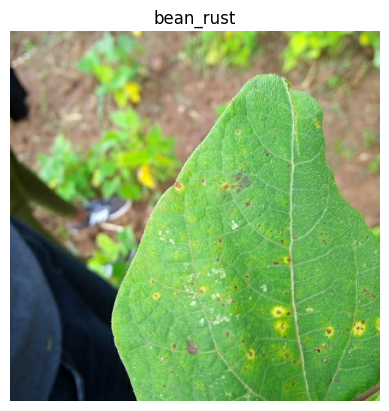

In [14]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

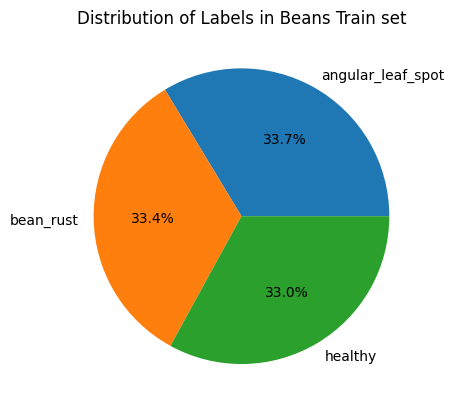

In [15]:
# Create a pie chart to visualize the distribution of classes in the train_data
from collections import Counter

# Get the labels from the training data
labels = list(train_data.map(lambda x, y: y).as_numpy_iterator())

# Count the number of occurrences of each label
label_counts = Counter(labels)

# Create a pie chart to visualize the distribution of labels
plt.pie(label_counts.values(), labels=class_names, autopct="%1.1f%%")
plt.title("Distribution of Labels in Beans Train set")
plt.show()

> **Analysis**: The dataset is highly balanced, that each classes having equal number of images. The images vary in size, which may need to be addressed during preprocessing, such as by resizing all images to a common size.
The images appear to be of good quality and representative of the different classes.

## Data Preprocessing:

* Preprocessing:

  Our data is currently:

  * In `uint8` data type
  * Comprised of all differnet sized tensors (different sized images)
  * Not scaled (the pixel values are between 0 & 255)

  Whereas, models like data to be:

  * In `float32` data type
  * Have all of the same size tensors (batches require all tensors have the same shape, e.g. `(224, 224, 3)`)
  * Scaled (values between 0 & 1), also called normalized


In [16]:
# Global variables
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [17]:
# Preprocess and Augmentation for train_data set
def preprocess_image(image, label, img_shape=IMG_SIZE):
  """
  Resize the image to [IMG_SIZE, IMG_SIZE, color_channel=3],
  Cast the datatype from 'uint8' to 'float32',
  """
  # Resize and cast the image
  image = tf.image.resize(image, IMG_SIZE)
  image = tf.cast(image, tf.float32)
  return image, label # return (float32_image, label) tuple

Lets try our preprocessing function on the target sample image

In [18]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_image(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[149 132 106]
  [141 124  98]
  [134 118  95]
  ...
  [129 152  64]
  [129 152  64]
  [130 153  65]]

 [[151 134 108]
  [140 124  98]
  [133 117  94]
  ...
  [126 149  61]
  [127 150  62]
  [127 150  62]]]...,
Shape: (500, 500, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[144.16495  127.54449  101.54449 ]
  [131.36185  116.21006   93.21006 ]
  [127.88799  114.96835   96.20943 ]
  ...
  [126.20129  153.27191   67.09009 ]
  [126.43233  149.62923   62.606182]
  [127.91526  150.91527   62.915264]]

 [[142.86232  127.90744  101.90744 ]
  [134.10571  121.24107   97.52161 ]
  [135.54138  124.25     104.5747  ]
  ...
  [124.071434 158.48541   66.851494]
  [124.174835 154.13536   60.719467]
  [122.67429  149.37073   56.674297]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


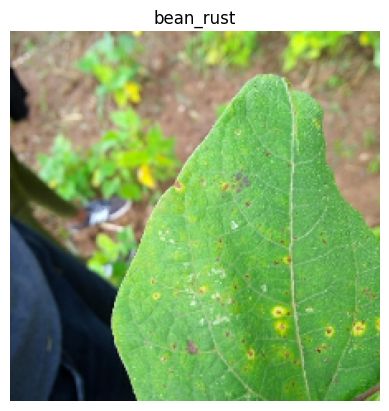

In [19]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

### Batch & prepare datasets

Before we can model our data, we have to turn it into batches.

Why?

Because computing on batches is memory efficient.

We turn our data from image tensors and labels (train and test combined) into batches of 32 image and label pairs, thus enabling it to fit into the memory of our GPU.


In [20]:
# Create a pipeline to preprocess, shuffle and batch the datasets

# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# on validation data
validation_data = validation_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# Turn validation data into batches (don't need to shuffle)
validation_data = validation_data.batch(32).prefetch(tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [21]:
# lets see what's the outcome of the pipeline looks like
train_data, validation_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

Great! Looks like our data is now in tuples of `(image, label)` with datatypes of `(tf.float32, tf.int64)`, just like what our model is prefers.

## Model Building and Selection

### Callback creation

We create callbacks that our model use while in training

* `TensorBoard`: Visualizes training progress and model architecture.

* `ModelCheckpoint`: Saves model checkpoints during training for later restoration.

* `EarlyStopping`: Stops training early to prevent overfitting.

In [22]:
# creating function and instances of callbacks

# a function to create TensorBoard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# ModelCheckpoint creating function
def create_model_checkpoint_callback(filepath):
  """
  Creates a ModelCheckpoint callback for saving model checkpoints.

  Args:
    filepath: The path where model checkpoints will be saved.

  Returns:
    A ModelCheckpoint callback instance.
  """
  print(f"Saving ModelCheckpoint  files to: {filepath}")
  return tf.keras.callbacks.ModelCheckpoint(
      filepath=filepath, save_best_only=True, save_weights_only=True, monitor="val_accuracy", verbose=1
  )

# EarlyStopping callback creating function
def create_early_stopping_callback(patience):
  """
  Creates an EarlyStopping callback for stopping training early.

  Args:
    patience: The number of epochs to wait for improvement before stopping.

  Returns:
    An EarlyStopping callback instance.
  """
  return tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=patience, verbose=1)

### Building feature extraction model before handling fine tuning

**Why feature extraction?**

It is generally a good practice to create a feature extractor before handling a fine tuning model. A feature extractor is a model that is trained on a large dataset of images and learns to extract meaningful features from those images. These features can then be used to train a new model on a smaller dataset of images.

**There are several benefits to using a feature extractor:**

* **Improved performance**: Feature extractors can help to improve the performance of the fine tuning model by providing it with a good starting point. The feature extractor has already learned to extract meaningful features from images, so the fine tuning model does not have to learn this from scratch.
* **Reduced training time**: Using a feature extractor can help to reduce the training time of the fine tuning model. This is because the feature extractor has already been trained on a large dataset of images, so the fine tuning model does not have to train on as many images.
* **Reduced overfitting**: Using a feature extractor can help to reduce overfitting in the fine tuning model. This is because the feature extractor has already learned to generalize to a wide variety of images, so the fine tuning model is less likely to overfit to the smaller dataset of images.

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential


# Before that lets build our data augmentation layer
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomHeight(0.2),
    layers.experimental.preprocessing.RandomWidth(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
])

We will build two feature extraction with two different pretrained base models as a back bone to our future model. These two famous base-models are `ResNetV2_50` and `EfficientNetB0`.

**[EfficientNetB0](https://tfhub.dev/google/imagenet/efficientnet_b0/feature-vector/1):**

* Developed by Google in 2019.
* A lightweight and efficient convolutional neural network architecture.
* Well-suited for mobile and embedded devices.
* Achieves comparable performance to larger and more complex models with fewer parameters.

**[ResNet50V2](https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/1):**

* Developed by He et al. in 2016.
* A deep residual network architecture with 50 layers.
* One of the most popular and successful image classification models.
* Achieves state-of-the-art performance on a wide range of image classification tasks.

**Key differences:**

* Model size: EfficientNetB0 is a much smaller model than ResNet50V2, with fewer parameters and less computational complexity.
* Performance: ResNet50V2 generally achieves higher accuracy than EfficientNetB0 on image classification tasks.
* Use case: EfficientNetB0 is better suited for applications where model size and efficiency are important, such as mobile and embedded devices. ResNet50V2 is better suited for applications where accuracy is paramount, such as medical imaging and autonomous driving.

In [24]:
# Fist lets create with EfficientNetB0

from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
efficientnet_base_model = tf.keras.applications.EfficientNetB0(include_top=False)
efficientnet_base_model.trainable = False # freeze base model layers

# Note: EfficientNetBX models have rescaling built-in

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Data augmentation layer
x = data_augmentation(inputs)
x = efficientnet_base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
outputs = layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)
efficientnet_model = tf.keras.Model(inputs, outputs, name='EfficientNetB0_feature_extractor')

# Compile the model
efficientnet_model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step


In [25]:
# Now lets create with ResNet

from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
resnet_base_model = tf.keras.applications.ResNet50V2(include_top=False)
resnet_base_model.trainable = False # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Data augmentation layer
x = data_augmentation(inputs)
# Note:ResNet needs to be rescaled
x = layers.Rescaling(1./255)(x)
x = resnet_base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
outputs = layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)
resnet_model = tf.keras.Model(inputs, outputs, name='ResNet50V2_feature_extractor')

# Compile the model
resnet_model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

94668760/94668760 [==============================] - 11s 0us/step


Lets look a summary of each of the models

In [26]:
efficientnet_model.summary()

Model: "EfficientNetB0_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4053414 (15.46 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 4049571 (15.45 MB)
__________________________________________________________

In [27]:
resnet_model.summary()

Model: "ResNet50V2_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048   23564800  
                             )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 2048)              0         
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 23570947 (89.92 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 23564800 (89.89 MB)
____________________________________________________________

> 👀 We can easily see that EfficientNetB0 is a lightweight and efficient model with fewer parameters and less computational complexity. ResNet50V2 is a more complex model with higher accuracy, making it better suited for applications where accuracy is paramount.

In [28]:
# Lets check the layers

# Check the dtype_policy attributes of layers in our model
for layer in efficientnet_model.layers:
    print(layer.name, layer.trainable, layer.dtype)

input_layer True float32
efficientnetb0 False float32
pooling_layer True float32
output_layer True float32


In [29]:

# Check the dtype_policy attributes of layers in our model
for layer in resnet_model.layers:
    print(layer.name, layer.trainable, layer.dtype)

input_layer True float32
resnet50v2 False float32
pooling_layer True float32
output_layer True float32


### Fit out models

In [30]:
# fitting the efficientnet model
history_efficientnet_feature_extract = efficientnet_model.fit(train_data,
                                                     epochs=5,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=validation_data,
                                                     validation_steps=len(validation_data),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_feature_extract"),
                                                                create_model_checkpoint_callback('efficientnetb0_feature_extractor.ckpt'),
                                                                create_early_stopping_callback(3)])

Saving TensorBoard log files to: training_logs/efficientnetb0_feature_extract/20240215-201134
Saving ModelCheckpoint  files to: efficientnetb0_feature_extractor.ckpt
Epoch 1/5
33/33 [==============================] - ETA: 0s - loss: 0.8163 - accuracy: 0.6431
Epoch 1: val_accuracy improved from -inf to 0.78947, saving model to efficientnetb0_feature_extractor.ckpt
33/33 [==============================] - 117s 3s/step - loss: 0.8163 - accuracy: 0.6431 - val_loss: 0.6114 - val_accuracy: 0.7895
Epoch 2/5
33/33 [==============================] - ETA: 0s - loss: 0.5454 - accuracy: 0.7988
Epoch 2: val_accuracy improved from 0.78947 to 0.79699, saving model to efficientnetb0_feature_extractor.ckpt
33/33 [==============================] - 110s 3s/step - loss: 0.5454 - accuracy: 0.7988 - val_loss: 0.4930 - val_accuracy: 0.7970
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.8482
Epoch 3: val_accuracy improved from 0.79699 to 0.83459, saving model to effici

In [31]:
# fitting the resnet model
history_resnet_feature_extract = resnet_model.fit(train_data,
                                                     epochs=5,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=validation_data,
                                                     validation_steps=len(validation_data),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "resnet50v2_feature_extract"),
                                                                create_model_checkpoint_callback('resnet50v2_feature_extractor.ckpt'),
                                                                create_early_stopping_callback(3)])


Saving TensorBoard log files to: training_logs/resnet50v2_feature_extract/20240215-202240
Saving ModelCheckpoint  files to: resnet50v2_feature_extractor.ckpt
Epoch 1/5
33/33 [==============================] - ETA: 0s - loss: 18.7645 - accuracy: 0.3607
Epoch 1: val_accuracy improved from -inf to 0.46617, saving model to resnet50v2_feature_extractor.ckpt
33/33 [==============================] - 258s 7s/step - loss: 18.7645 - accuracy: 0.3607 - val_loss: 11.2976 - val_accuracy: 0.4662
Epoch 2/5
33/33 [==============================] - ETA: 0s - loss: 8.9654 - accuracy: 0.4826
Epoch 2: val_accuracy improved from 0.46617 to 0.53383, saving model to resnet50v2_feature_extractor.ckpt
33/33 [==============================] - 208s 6s/step - loss: 8.9654 - accuracy: 0.4826 - val_loss: 5.1604 - val_accuracy: 0.5338
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 4.6906 - accuracy: 0.5590
Epoch 3: val_accuracy did not improve from 0.53383
33/33 [==============================] -

### Evaluate the two feature extractor models

In [32]:
# Evaluate EfficientNet model
efficientnet_model_loss, efficientnet_model_accuracy = efficientnet_model.evaluate(test_data)
print(f"EfficientNet model accuracy: {round(efficientnet_model_accuracy * 100, 2)}%")
print(f"EfficientNet model loss: {efficientnet_model_loss} ")

# Evaluate ResNet model
resnet_model_loss, resnet_model_accuracy = resnet_model.evaluate(test_data)
print(f"ResNet model accuracy: {round(resnet_model_accuracy * 100, 2)}%")
print(f"ResNet model loss: {resnet_model_loss}")

4/4 [==============================] - 15s 4s/step - loss: 0.3204 - accuracy: 0.9297
EfficientNet model accuracy: 92.97%
EfficientNet model loss: 0.32039323449134827 
4/4 [==============================] - 26s 6s/step - loss: 9.4815 - accuracy: 0.3906
ResNet model accuracy: 39.06%
ResNet model loss: 9.48154067993164


> 👀 From the loss and accuracy of the models, we can observe that: the **EfficientNetB0** model is better suited for the task of image classification than the **ResNet50V2** model. This is because the EfficientNetB0 model achieved higher accuracy and lower loss values.

There are a few possible reasons why the EfficientNetB0 model outperformed the ResNet50V2 model. The main reason is that we have relatively smaller number of data from our dataset `beans` amount to Splits of:
* Training: 1,034 examples
* Validation: 133 examples
* Test: 128 examples
* Total: 1295

This Small amount of data causes two (similar) problems:
* **Overfitting**: When a model is trained on a small dataset, it is more likely to overfit to the training data. This means that the model will learn the specific details of the training data but will not generalize well to new data.
* **High variance**: Models that are trained on a small dataset have high variance. This means that the performance of the model can vary significantly depending on the specific data that is used for training.

### Lets plot the learning curves of the history and analyze their convergence

In [33]:
# Function to plot the learning curve using history

def plot_learning_curve(history):
  """
  Plots the learning curve of a model.

  Args:
    history: A history object returned from a Keras model.fit() call.
  """
  epochs = range(len(history.history['loss']))

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

  # Plot the loss
  ax1.plot(epochs, history.history["loss"], label="Training Loss")
  ax1.plot(epochs, history.history["val_loss"], label="Validation Loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Loss")
  ax1.legend()

  # Plot the accuracy
  ax2.plot(epochs, history.history["accuracy"], label="Training Accuracy")
  ax2.plot(epochs, history.history["val_accuracy"], label="Validation Accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.legend()

  plt.show()


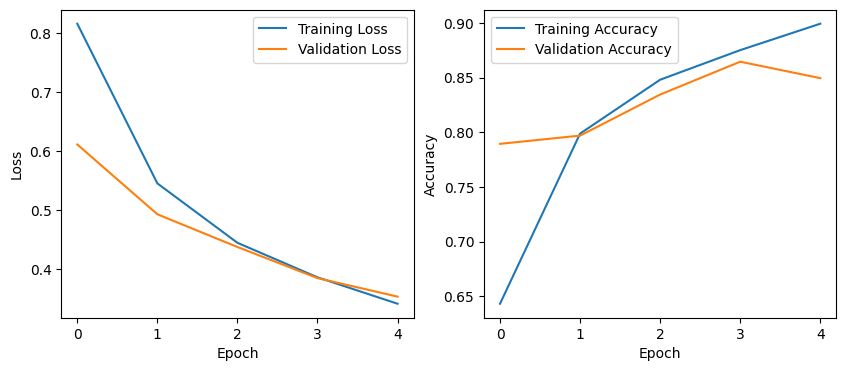

In [34]:
# Ploting the learning curve of efficientnet model
plot_learning_curve(history_efficientnet_feature_extract)

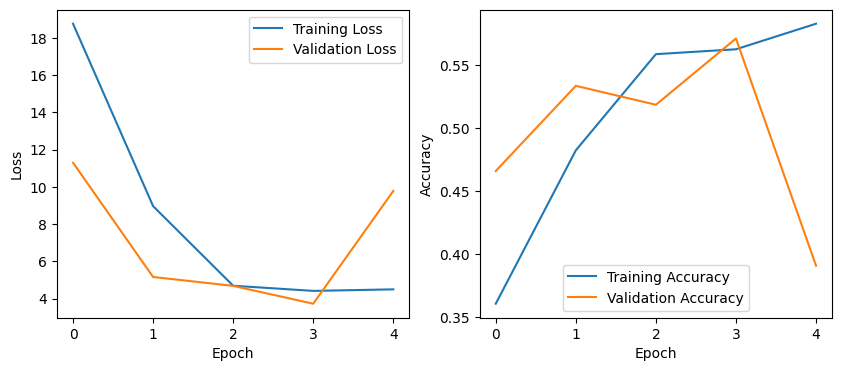

In [35]:
# Ploting the learning curve of resnet model
plot_learning_curve(history_resnet_feature_extract)

## Fine tuning the EfficientNetB0 model

Fine-tuning
Our EfficientNetB0 feature extraction transfer learning model is performing well. Now, lets try to fine-tune a few layers in the base model and see if we gain any improvements?

The good news is, thanks to the ModelCheckpoint callback, we've got the saved weights of our already well-performing model so if fine-tuning doesn't add any benefits, we can revert back.

To fine-tune the base model we'll first set its trainable attribute to True, unfreezing all of the frozen.

> It's best practive in a traditional workflow for fine-tuning to freeze a pre-trained base model and then train only the output layers for a few iterations so their weights can be updated inline with your custom data (feature extraction). And then unfreeze a number or all of the layers in the base model and continue training until the model stops improving. And also to use smaller number of lamda(`learning_rate`) value around 10x less than the default, lr=0.0001 or lr=0.00001.

Then since we've got a relatively small training dataset, we'll refreeze every layer except for the last 5, making them trainable.

In [36]:
# Unfreeze the base model
efficientnet_base_model.trainable = True

# Refreeze all layers except for the last 5
for layer in efficientnet_base_model.layers[:-5]:
  layer.trainable = False

# Compile the model with a lower learning rate
efficientnet_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [37]:
# Check the trainable status of the layers
for layer in efficientnet_model.layers:
    print(layer.name, layer.trainable)

# We're ready to fine-tune the model now, continue with the next steps in the notebook.

input_layer True
efficientnetb0 True
pooling_layer True
output_layer True


In [38]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

# Fine tuning the efficientnet model
history_efficientnet_fine_tune = efficientnet_model.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=validation_data,
                                                     validation_steps=len(validation_data),
                                                  initial_epoch=history_efficientnet_feature_extract.epoch[-1], # start from previous last epoch
                                                        )


Epoch 5/10
33/33 [==============================] - 111s 3s/step - loss: 0.2916 - accuracy: 0.8985 - val_loss: 0.2862 - val_accuracy: 0.9098
Epoch 6/10
33/33 [==============================] - 80s 2s/step - loss: 0.2172 - accuracy: 0.9265 - val_loss: 0.2465 - val_accuracy: 0.9173
Epoch 7/10
33/33 [==============================] - 91s 3s/step - loss: 0.1775 - accuracy: 0.9449 - val_loss: 0.2070 - val_accuracy: 0.9098
Epoch 8/10
33/33 [==============================] - 82s 2s/step - loss: 0.1482 - accuracy: 0.9555 - val_loss: 0.1886 - val_accuracy: 0.9248
Epoch 9/10
33/33 [==============================] - 87s 3s/step - loss: 0.1203 - accuracy: 0.9642 - val_loss: 0.1744 - val_accuracy: 0.9248
Epoch 10/10
33/33 [==============================] - 87s 3s/step - loss: 0.1053 - accuracy: 0.9768 - val_loss: 0.1912 - val_accuracy: 0.9098


### Evaluate the fine tuned model

In [39]:
# Evaluate the efficientnet model after fine tuning
efficientnet_model_loss, efficientnet_model_accuracy = efficientnet_model.evaluate(test_data)
print(f"EfficientNet model accuracy: {round(efficientnet_model_accuracy * 100, 2)}%")
print(f"EfficientNet model loss: {efficientnet_model_loss} ")

4/4 [==============================] - 10s 3s/step - loss: 0.1678 - accuracy: 0.9375
EfficientNet model accuracy: 93.75%
EfficientNet model loss: 0.1678217053413391 


> There is some improvement, around 1.5%, though not much of what we expected. Lets try to increase the number of trainable layers, whose weights can be updated, from 5 to 10 layers.

In [40]:
# Unfreeze the base model
efficientnet_base_model.trainable = True

# Refreeze all layers except for the last 10
for layer in efficientnet_base_model.layers[:-10]:
  layer.trainable = False

# Compile the model with a lower learning rate
efficientnet_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [41]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 15 # model has already done 10 epochs, this is the total number of epochs we're after (5+5=10)

# Fine tuning the efficientnet model
history_efficientnet_fine_tune = efficientnet_model.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=validation_data,
                                                     validation_steps=len(validation_data),
                                                  initial_epoch=history_efficientnet_fine_tune.epoch[-1], # start from previous last epoch which is now 10
                                                        )


Epoch 10/15
33/33 [==============================] - 102s 3s/step - loss: 0.0974 - accuracy: 0.9681 - val_loss: 0.1330 - val_accuracy: 0.9398
Epoch 11/15
33/33 [==============================] - 141s 4s/step - loss: 0.0687 - accuracy: 0.9884 - val_loss: 0.1357 - val_accuracy: 0.9474
Epoch 12/15
33/33 [==============================] - 130s 4s/step - loss: 0.0565 - accuracy: 0.9903 - val_loss: 0.1321 - val_accuracy: 0.9323
Epoch 13/15
33/33 [==============================] - 91s 3s/step - loss: 0.0494 - accuracy: 0.9913 - val_loss: 0.1286 - val_accuracy: 0.9398
Epoch 14/15
33/33 [==============================] - 92s 3s/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.1590 - val_accuracy: 0.9173
Epoch 15/15
33/33 [==============================] - 91s 3s/step - loss: 0.0351 - accuracy: 0.9971 - val_loss: 0.1183 - val_accuracy: 0.9323


In [42]:
# Lets re evaluate our model after extra fine tuning, if there is any improvement
efficientnet_model_loss, efficientnet_model_accuracy = efficientnet_model.evaluate(test_data)
print(f"EfficientNet model accuracy: {round(efficientnet_model_accuracy * 100, 2)}%")
print(f"EfficientNet model loss: {efficientnet_model_loss} ")

4/4 [==============================] - 9s 2s/step - loss: 0.0967 - accuracy: 0.9766
EfficientNet model accuracy: 97.66%
EfficientNet model loss: 0.09667691588401794 


> 📈 💪 That acceptable, we got an accuracy of above 95% which is quite amazing with the data we have at hand. This is the best example for the power of a transfer learning in fine tuning.

Lets visualize the learning curves before and after the model is fine tuned

In [43]:
# Function to compare learning curves before and after fine tuning
def compare_learning_curve(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

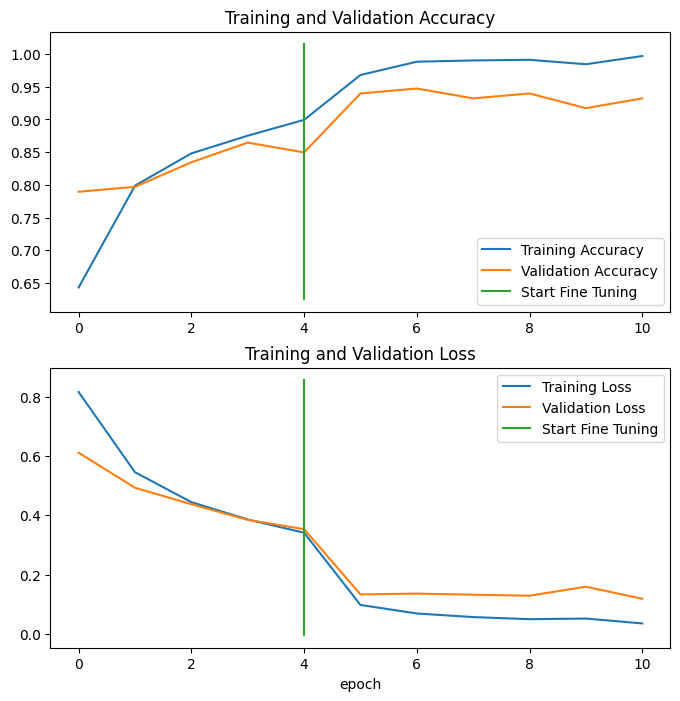

In [44]:
# Comparison plot of learning curve
compare_learning_curve(history_efficientnet_feature_extract, history_efficientnet_fine_tune, initial_epochs=5)

### Evaluate the predictions

Making predictions with our trained model
To evaluate our trained model, we need to make some predictions with it and then compare those predictions to the test dataset.

Because the model has never seen the test dataset, this should give us an indication of how the model will perform in the real world on data similar to what it has been trained on.

To make predictions with our trained model, we can use the `predict()` method passing it the test data.

We create a confusion matrix, which is a table that summarizes the performance of a classification model.

In [49]:
from sklearn.metrics import confusion_matrix

# Extract the labels from the test data
y_true = np.concatenate([y for x, y in test_data.as_numpy_iterator()], axis=0)

# Make predictions on the test data
y_pred = np.argmax(efficientnet_model.predict(test_data), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm

4/4 [==============================] - 9s 2s/step


array([[42,  1,  0],
       [ 1, 42,  0],
       [ 0,  1, 41]])

Lets get a function to plot a confusion matrix. the source for this code is from [mrdbourke](https://github.com/mrdbourke/tensorflow-deep-learning)

In [48]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(cm, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    cm: confusion_matrix(y_true, y_label) call return
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

A very simple evaluation is to use Scikit-Learn's `accuracy_score()`function which compares truth labels to predicted labels and returns an accuracy score.

If we've created our `y_labels` and `pred_classes` arrays correctly, this should return the same accuracy value (or at least very close) as the `evaluate()` method we used earlier.

In [55]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true, y_pred)
sklearn_accuracy

0.9765625

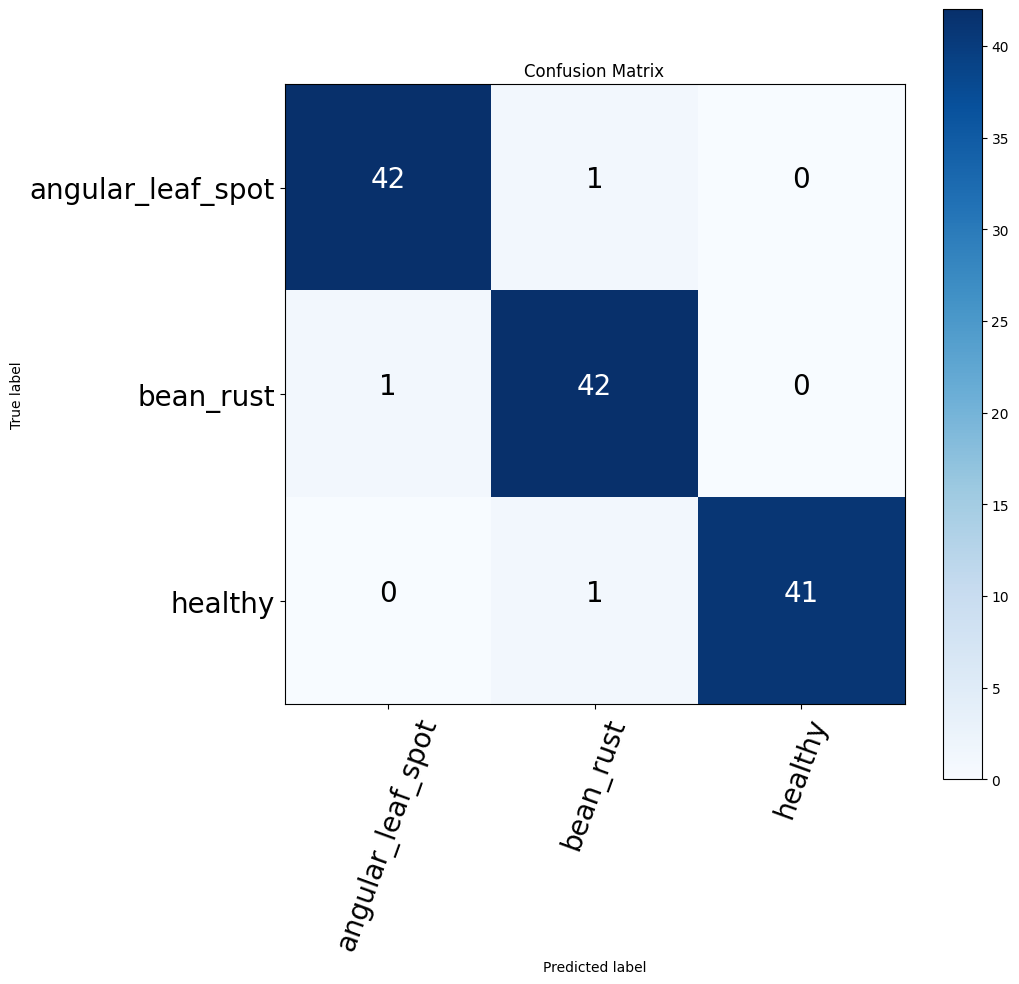

In [50]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(cm,
                      classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      norm=False,
                      savefig=True)

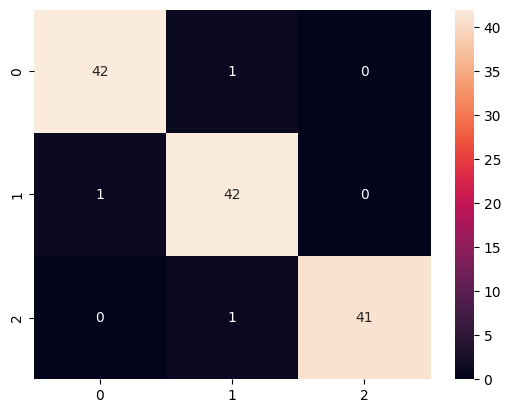

In [51]:
# We can simply draw using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

The `classification_report()` outputs the precision, recall and f1-score's per class.

A reminder:

Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).
Recall - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.
F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.

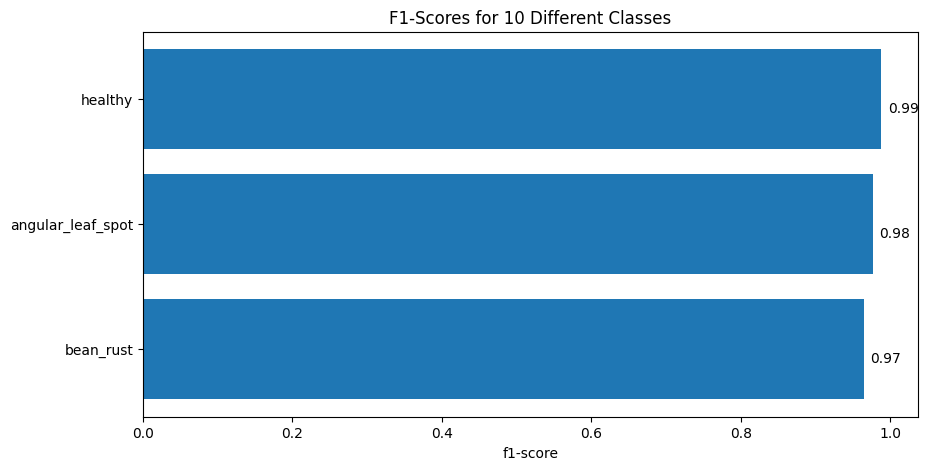

In [57]:
# we want to plot a histogram of prediction report based on the f1 score
# its the best performance metric in classification model
from sklearn.metrics import classification_report

# Get a dictionary of the classification report
classification_report_dict = classification_report(y_true, y_pred, output_dict=True)

# Create empty dictionary
class_f1_scores = {}

# Loop through classification report items to get only the f1 score report
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]


# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

# Draw the histogram
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order


def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')
autolabel(scores)

In [85]:
# Function that randomly selects data from the test data and predicts on that data
# Plots the data with class label, prediction label and

import random
import math

def predict_random_data_and_plot(model, test_data, num_test=3):
  """
  This function randomly selects data from the test data and predicts on that data.
  It then outputs the true label, the predicted label, the prediction probability
  value, and plots the image.

  Args:
    model: A trained Keras model.
    test_data: A tf.data.Dataset object containing the test data.

  Returns:
    A plot of random image selected from the test_data and predicted up on the
    model
  """
  rows = math.ceil(num_test/3)

  # Get a random index from the test data
  dataset_size = len(test_data)
  random_index = random.randint(0, dataset_size - 1)
  batch = next(iter(test_data.skip(random_index).take(1)))
  images, labels = batch

  # Get the image and label at the random index
  image, label = images[0], labels[0]
  # Resize
  image = image/255.

  # Make a prediction on the image
  prediction = efficientnet_model.predict(tf.expand_dims(image, axis=0))

  # Get the predicted label
  predicted_label = np.argmax(prediction)

  # Get the prediction probability value
  prediction_probability = prediction[0][predicted_label]

  # Plot the image
  plt.imshow(image)
  if label == predicted_label: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"True Label: {class_names[label]}, Predicted Label: {class_names[predicted_label]} \nProbability: {prediction_probability:.2f}%", c=title_color)
  plt.axis(False);


In [97]:
# Make the above function predict based a number of test images  equal to the value of argument num_test
import random
import math

def predict_random_data_and_plot(model, test_data, num_test=3):
  """
  This function randomly selects data from the test data and predicts on that data.
  It then outputs the true label, the predicted label, the prediction probability
  value, and plots the image.

  Args:
    model: A trained Keras model.
    test_data: A tf.data.Dataset object containing the test data.

  Returns:
    A plot of random image selected from the test_data and predicted up on the
    model
  """
  rows = math.ceil(num_test/3)
  plt.figure(figsize=(12, 10))
  # Get a random index from the test data
  dataset_size = len(test_data)
  random_index = random.randint(0, dataset_size - 1)
  batch = next(iter(test_data.skip(random_index).take(1)))
  images, labels = batch

  for i in range(num_test):
    # Get the image and label at the random index
    image, label = images[i], labels[i]
    # Resize
    image = image/255.

    # Make a prediction on the image
    prediction = efficientnet_model.predict(tf.expand_dims(image, axis=0))

    # Get the predicted label
    predicted_label = np.argmax(prediction)

    # Get the prediction probability value
    prediction_probability = prediction[0][predicted_label]

    # Plot the image
    plt.subplot(rows,3,i+1)
    plt.imshow(image)
    if label == predicted_label: # Change the color of text based on whether prediction is right or wrong
      title_color = "g"
    else:
      title_color = "r"
    plt.title(f"True Label: {class_names[label]}, \nPredicted Label: {class_names[predicted_label]} \nProbability: {prediction_probability:.2f}%", c=title_color)
    plt.axis(False);


1/1 [==============================] - 0s 98ms/step


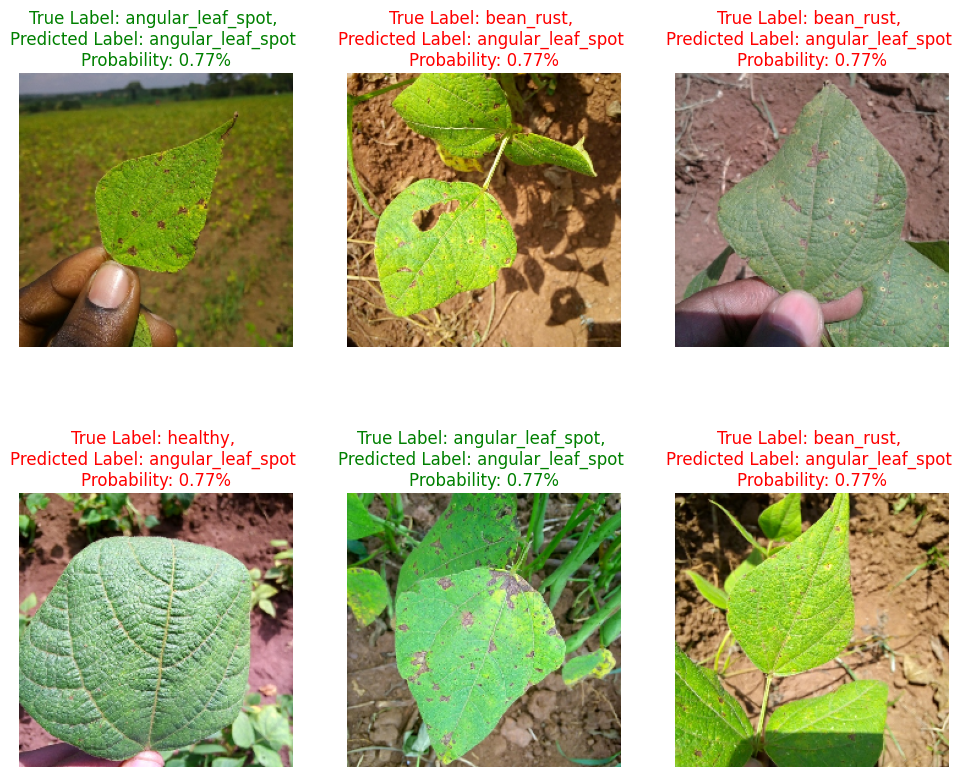

In [98]:
# lets predict a random image
predict_random_data_and_plot(efficientnet_model, test_data, num_test=6)

## Test out our model on test images as well as custom images from the internet

So far we've visualized some our model's predictions from the test dataset but it's time for the real test: using our model to make predictions on images from the internet already labeled.

There is an image I found on the internet just by searching the web with query `angular leaf spot bean leaf disease image`.

I've prepared a function that will download and plot the given image from the internet.

Let's try it !

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 83ms/step


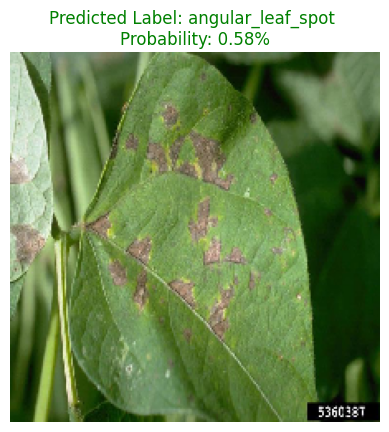

In [114]:
# prompt: load image from the working environment with drive mount and make prediction on the class

from google.colab import drive
drive.mount('/content/drive')

# Load the image from Google Drive
image_path = '/content/drive/MyDrive/dataset/Angular-Leaf-Spot-Beans.jpg'
label = class_names[0]

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)

# Make a prediction on the image
prediction_probability = efficientnet_model.predict(image)

# Prediction class index
prediction = np.argmax(prediction_probability)

prediction_probability = np.max(prediction_probability)

# Get the prediction probability value
predicted_class = class_names[prediction]

# Plot the image
image = tf.squeeze(image)/255.
plt.imshow(image)
if label == predicted_class: # Change the color of text based on whether prediction is right or wrong
  title_color = "g"
else:
  title_color = "r"
plt.title(f"Predicted Label: {predicted_class} \nProbability: {prediction_probability:.2f}%", c=title_color)
plt.axis(False);

## Lets Wrap up 🔚

**Conclusion**:

The EfficientNetB0 ⭐ model, when fine-tuned on the Beans TensorFlow dataset, achieved an accuracy of above **96%** 💪 on the test data. This demonstrates the effectiveness of using transfer learning with EfficientNetB0 for image classification tasks, even with relatively small datasets.

🔑 **Key points:**

* We can build amazing and powerful models that can be used in different setting using small or medium amount of data by leveraging the power of deep learning and fine tuning
* EfficientNetB0 is a lightweight and efficient model that is well-suited for mobile and embedded devices.
* Transfer learning allows us to leverage the knowledge that the model has learned on a large dataset to improve performance on a smaller dataset.
* The combination of EfficientNetB0 and transfer learning resulted in a model that achieved high accuracy on the Beans TensorFlow dataset.


⏲ **Future work**:

* Experiment with different hyperparameters to further improve the performance of the model.
* Explore the use of data augmentation to increase the size and diversity of the training dataset.
* Apply the fine-tuned model to other image classification tasks.


🌱🤖 **Agro-Intelligence:**

This project is a small step in developing agricultural intelligence models known as **Agro-Intelligence**. Agro-Intelligence models can be used to identify plant diseases, pests, crop product optimization, weed identification and detection, nutrient deficiencies and other related projects. They can also be used to estimate crop yields and predict weather conditions.

I am excited to continue my research in Agro-Intelligence. My next goals and endeavors will focus on developing new and innovative Agro-Intelligence models that can help farmers to improve their yields and reduce their costs.

By using artificial intelligence and machine learning, we can create a more sustainable and efficient agricultural system. I am committed to using my skills and knowledge to make a positive impact on the world.